# Moving Average Filter

Jonathan Forhan

[source](https://colab.research.google.com/drive/1vyUNg8Kuj3onq4TgMtDlcKZqhbU7aZ_I)

This project focuses on two discrete LTI systems, the 4-sample and 5-sample moving average filters.


## Difference Equations

\begin{align*}
\textrm{Four sample:} \\
y_4&=\frac14\left(x[n]+x[n+1]+x[n+2]+x[n+3]\right)\tag{1} \\
\textrm{Five sample:} \\
y_5&=\frac15\left(x[n]+x[n+1]+x[n+2]+x[n+3]+x[n+4]\right)\tag{2}
\end{align*}

## State Space Descriptions

State space equations take the form:
\begin{align*}
q[n+1] &= Aq[n]+bx[n] \\
y[n] &= Cq[n]+dx[n] \\ \tag{3}
\end{align*}

<br>

**Four sample:**
\begin{align*}
\left[
    \begin{array}{c}
    q_1[n+1] \\
    q_2[n+1] \\
    q_3[n+1]
    \end{array}
\right]
& =
\left[
    \begin{array}{ccc}
    0 & 0 & 0 \\
    1 & 0 & 0 \\
    0 & 1 & 0
    \end{array}
\right]
\left[
    \begin{array}{c}
    q_1[n] \\
    q_2[n] \\
    q_3[n]
    \end{array}
\right]
+
\left[
    \begin{array}{c}
    1 \\
    0 \\
    0
    \end{array}
\right]
x[n]
\\
y_4[n] &=
\left[ \frac14 \space\space \frac14 \space\space \frac14 \right]
\left[
    \begin{array}{c}
    q_1[n] \\
    q_2[n] \\
    q_3[n]
    \end{array}
\right]
+
\frac14x[n] \\ \tag{4}
\end{align*}

<br>

**Five sample:**
\begin{align*}
\left[
    \begin{array}{c}
    q_1[n+1] \\
    q_2[n+1] \\
    q_3[n+1] \\
    q_4[n+1]
    \end{array}
\right]
& =
\left[
    \begin{array}{cccc}
    0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0
    \end{array}
\right]
\left[
    \begin{array}{c}
    q_1[n] \\
    q_2[n] \\
    q_3[n] \\
    q_4[n]
    \end{array}
\right]
+
\left[
    \begin{array}{c}
    1 \\
    0 \\
    0 \\
    0
    \end{array}
\right]
x[n]
\\
y_5[n] &=
\left[ \frac15 \space\space \frac15 \space\space \frac15 \space\space \frac15 \right]
\left[
    \begin{array}{c}
    q_1[n] \\
    q_2[n] \\
    q_3[n] \\
    q_4[n]
    \end{array}
\right]
+
\frac15x[n] \\ \tag{5}
\end{align*}

In [ ]:
# util

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def plt_conf(p, x_label=None, y_label=None, title=None):
    p.grid()
    x_label and p.xlabel(x_label)
    y_label and p.ylabel(y_label)
    title and p.title(title)

## Impulse Responses

Impulse response $h[n]$ is the output when the input is the impulse sequence $\delta[n]$. We will plug $x[n]=\delta[n]$ into the difference equation and compute $y[n]=h[n]$.

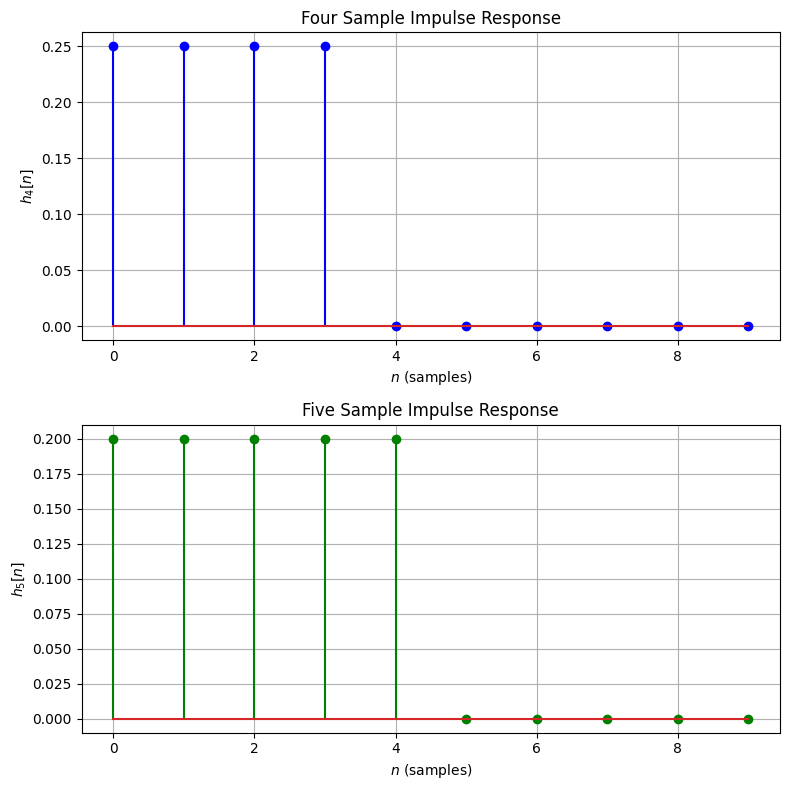

In [ ]:
ITER=10

# see difference eq
sys4 = sig.dlti([1/4]*4, [1,0,0,0])
sys5 = sig.dlti([1/5]*5, [1,0,0,0,0])

n4, h4 = sig.dimpulse(sys4, n=ITER)
h4 = np.squeeze(h4)

n5, h5 = sig.dimpulse(sys5, n=ITER)
h5 = np.squeeze(h5)

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.stem(n4, h4, "blue")
plt_conf(plt, "$n$ (samples)", "$h_4[n]$", "Four Sample Impulse Response")

plt.subplot(212)
plt.stem(n5, h5, "green")
plt_conf(plt, "$n$ (samples)", "$h_5[n]$", "Five Sample Impulse Response")

plt.tight_layout()

## Transfer Functions

Because this system is LTI linearity applies, using our z-transform we see:

\begin{align*}
Y_4(z)&=\frac14\left(X_4(z)+z^{-1}X_4(z)+z^{-2}X_4(z)+z^{-3}X_4(z)\right) \\
Y_5(z)&=\frac15\left(X_5(z)+z^{-1}X_5(z)+z^{-2}X_5(z)+z^{-3}X_5(z)+z^{-4}X_5(z)\right) \\ \tag{6}
\end{align*}

The transfer functions is defined:
$$H(z)=\frac{Y(z)}{X(z)}\bigg|_{\textrm{initially relaxed}}$$

thus

\begin{align*}
H_4(z)&=\frac{Y_4(z)}{X_4(z)}=\frac14\left(1+z^{-1}+z^{-2}+z^{-3}\right)=\frac{z^{3}+z^{2}+z+1}{4z^{3}} \\
\\
H_5(z)&=\frac{Y_5(z)}{X_5(z)}=\frac15\left(1+z^{-1}+z^{-2}+z^{-3}+z^{-5}\right)=\frac{z^{4}+z^{3}+z^{2}+z+1}{5z^{4}} \\ \tag{7}
\end{align*}

Note that the final equation is manipulated to be a polynomial in the numerator.

In [ ]:
print(sys4.to_tf(), sys5.to_tf())

TransferFunctionDiscrete(
array([0.25, 0.25, 0.25, 0.25]),
array([1., 0., 0., 0.]),
dt: True
) TransferFunctionDiscrete(
array([0.2, 0.2, 0.2, 0.2, 0.2]),
array([1., 0., 0., 0., 0.]),
dt: True
)


## Frequency Response

The frequency response can be found by evaluating the transfer function $H(z)$ at $z=e^{j\omega T_s}$

using

$$H\left(e^{j\omega T_s}\right)=\frac{Y(\omega)}{X(\omega)}$$

we find

\begin{align*}
H_4\left(e^{j\omega T_s}\right)&=\frac{e^{3j\omega T_s}+e^{2j\omega T_s}+e^{j\omega T_s}+1}{e^{3j\omega T_s}} \\ \\
H_5\left(e^{j\omega T_s}\right)&=\frac{e^{4j\omega T_s}+e^{3j\omega T_s}+e^{2j\omega T_s}+e^{j\omega T_s}+1}{e^{4j\omega T_s}} \\
\tag{8}
\end{align*}

For the purposes of this project we use $T_s=1$

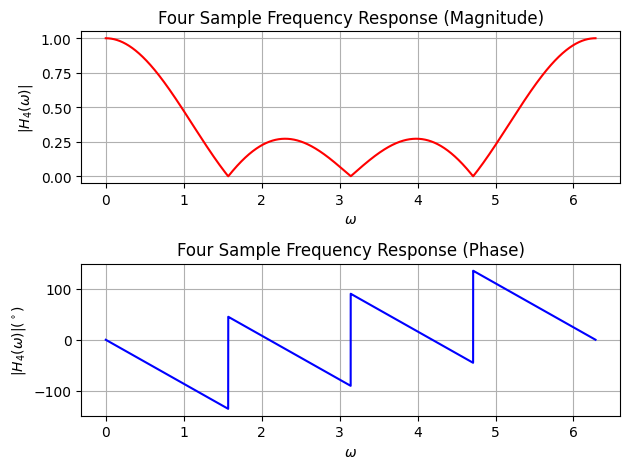

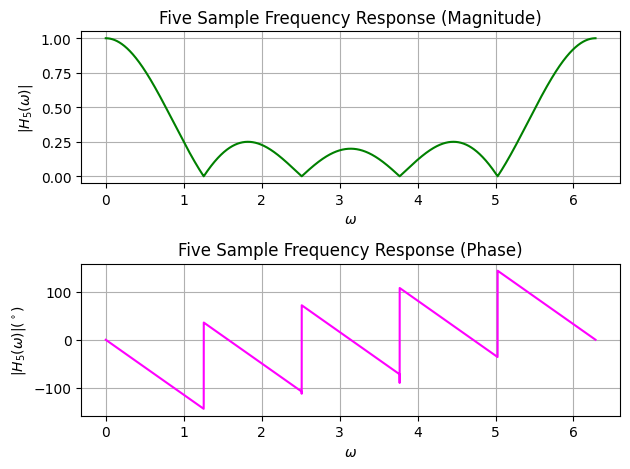

In [ ]:
w4, H4 = sig.dfreqresp(sys4, whole=True)  # 0 to 2pi
w5, H5 = sig.dfreqresp(sys5, whole=True)

plt.subplot(211)
plt.plot(w4, np.abs(H4), "red")
plt_conf(plt, "$\omega$", "$|H_4(\omega)|$", "Four Sample Frequency Response (Magnitude)")

plt.subplot(212)
plt.plot(w4, np.rad2deg(np.angle(H4)), "blue")
plt_conf(plt, "$\omega$", "$|H_4(\omega)|(^\circ)$", "Four Sample Frequency Response (Phase)")

plt.tight_layout()
plt.show()

plt.subplot(211)
plt.plot(w5, np.abs(H5), "green")
plt_conf(plt, "$\omega$", "$|H_5(\omega)|$", "Five Sample Frequency Response (Magnitude)")

plt.subplot(212)
plt.plot(w5, np.rad2deg(np.angle(H5)), "magenta")
plt_conf(plt, "$\omega$", "$|H_5(\omega)|(^\circ)$", "Five Sample Frequency Response (Phase)")

plt.tight_layout()
plt.show()

## Input Response

Next, we will test the moving average response to the input $x[n]=(3+(-1)^n)u[n]$ when the system is initially relaxed.

x[n] = [4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 



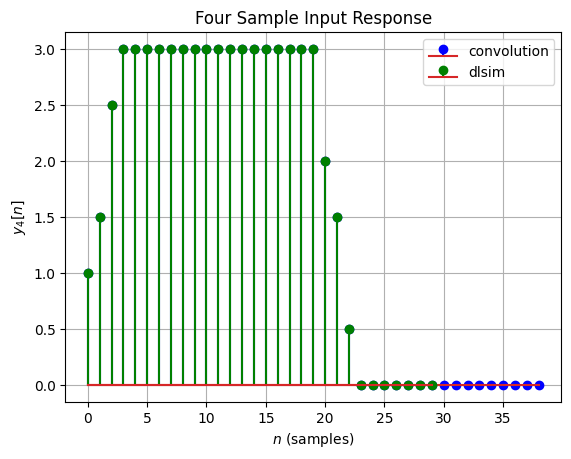

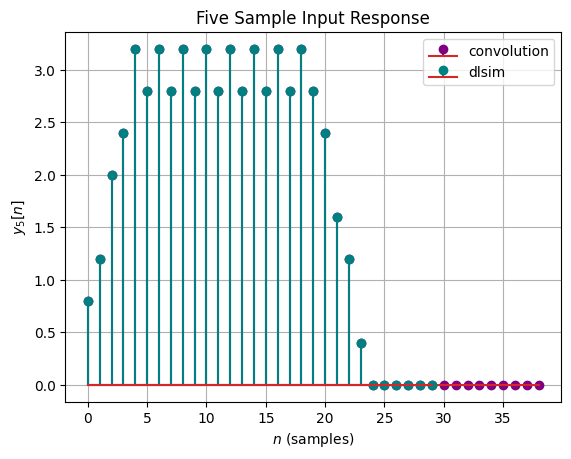

In [ ]:
ITER, PAD = 20, 10

u = lambda x: np.heaviside(x, 1)
x = [3 + (-1)**x * u(x) for x in range(ITER)] + [0]*PAD
print("x[n] =", x, "\n")

y4c = np.convolve(x, h4)
n4s, y4s = sig.dlsim(sys4, x)
plt.stem(y4c, "blue", label="convolution")
plt.stem(y4s, "green", label="dlsim")
plt_conf(plt, "$n$ (samples)", "$y_4[n]$", "Four Sample Input Response")
plt.legend(loc="best")
plt.show()

y5c = np.convolve(x, h5)
n5s, y5s = sig.dlsim(sys5, x)
plt.stem(y5c, "purple", label="convolution")
plt.stem(y5s, "teal", label="dlsim")
plt_conf(plt, "$n$ (samples)", "$y_5[n]$", "Five Sample Input Response")
plt.legend(loc="best")
plt.show()

Analysing the plots we can see each system's transient response to the input, again, $x[n]=(3+(-1)^n)u[n]$.

The four sample moving average increases until it hits the 4th element in which the 4 samples in memory are $[4, 2, 4, 2]$ or $[2, 4, 2, 4]$ which both average to 3.

The five sample moving average increasing util it hits the 5th elements and then begins to oscillate between 2.8 and 3.2. This is due to the fact that the values in memory change each cycle between $[4, 2, 4, 2, 4]$ and $[2, 4, 2, 4, 2]$ which average to 3.2 and 2.8 respectively.

With both systems we see that when the values go out of memory the averages gradually fall back down to zero.